<a href="https://colab.research.google.com/github/ganjire/Python_Project/blob/main/Python_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
# load dataset creditcard.csv


# df = pd.read_csv("dataset/card_transdata.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Dann den Dateipfad angeben
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/card_transdata.csv')



Mounted at /content/drive


In [4]:
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.describe().round(4)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.0000,1000000.0000,1000000.0000,1000000.0000,1000000.0000,1000000.0000,1000000.0000,1000000.0000
mean,26.6288,5.0365,1.8242,0.8815,0.3504,0.1006,0.6506,0.0874
std,65.3908,25.8431,2.7996,0.3232,0.4771,0.3008,0.4768,0.2824
min,0.0049,0.0001,0.0044,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3.8780,0.2967,0.4757,1.0000,0.0000,0.0000,0.0000,0.0000
50%,9.9678,0.9987,0.9977,1.0000,0.0000,0.0000,1.0000,0.0000
75%,25.7440,3.3557,2.0964,1.0000,1.0000,0.0000,1.0000,0.0000
max,10632.7237,11851.1046,267.8029,1.0000,1.0000,1.0000,1.0000,1.0000


In [8]:
# 1. Überprüfung auf Nullwerte
null_values = df.isnull().sum()
print("Null values in each column: " + null_values[null_values > 0].to_string())

# 2. Überprüfung auf nicht-numerische Werte
non_numeric = df.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    print("\nNon-numeric columns: " + ', '.join(non_numeric))

# 3. Überprüfung auf Duplikate
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 4. Überprüfung auf ungewöhnliche Werte (z.B. negative Werte, falls nicht erlaubt)
negative_values = (df < 0).sum()
print("\nNegative values in each column (if any): " + negative_values[negative_values > 0].to_string())





Null values in each column: Series([], )

Number of duplicate rows: 0

Negative values in each column (if any): Series([], )


In [9]:
# Übersicht über die Datentypen und eindeutige Werte jedes Features

for column in df.columns:
    print(f"Feature: {column}")
    print(f"Type: {df[column].dtype}")
    print(f"Unique Values: {df[column].nunique()}")
    print(f"Sample of Unique Values: {df[column].unique()[:5]}")  # Nur die ersten 5 eindeutigen Werte als Beispiel
    print("-" * 40)


Feature: distance_from_home
Type: float64
Unique Values: 1000000
Sample of Unique Values: [57.87785658 10.8299427   5.09107949  2.24756433 44.190936  ]
----------------------------------------
Feature: distance_from_last_transaction
Type: float64
Unique Values: 1000000
Sample of Unique Values: [0.31114001 0.1755915  0.80515259 5.60004355 0.56648627]
----------------------------------------
Feature: ratio_to_median_purchase_price
Type: float64
Unique Values: 1000000
Sample of Unique Values: [1.94593998 1.29421881 0.42771456 0.36266258 2.2227673 ]
----------------------------------------
Feature: repeat_retailer
Type: float64
Unique Values: 2
Sample of Unique Values: [1. 0.]
----------------------------------------
Feature: used_chip
Type: float64
Unique Values: 2
Sample of Unique Values: [1. 0.]
----------------------------------------
Feature: used_pin_number
Type: float64
Unique Values: 2
Sample of Unique Values: [0. 1.]
----------------------------------------
Feature: online_order
T

Distribution: fraud
0.0    912597
1.0     87403


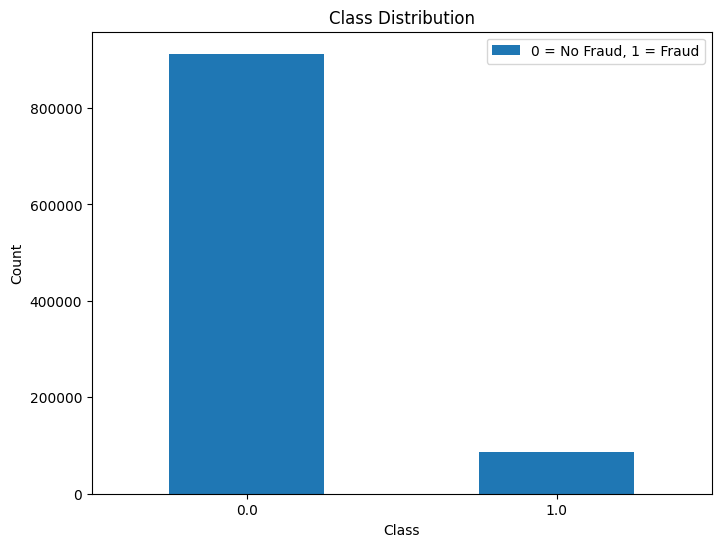

In [10]:
# class distribution (check if imbalanced)

class_counter = df["fraud"].value_counts()
print("Distribution: " + class_counter.to_string())

# Diagramm zur Visualisierung der Klassenverteilung

plt.figure(figsize=(8, 6))
class_counter.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['0 = No Fraud, 1 = Fraud'], loc='upper right')
plt.show()

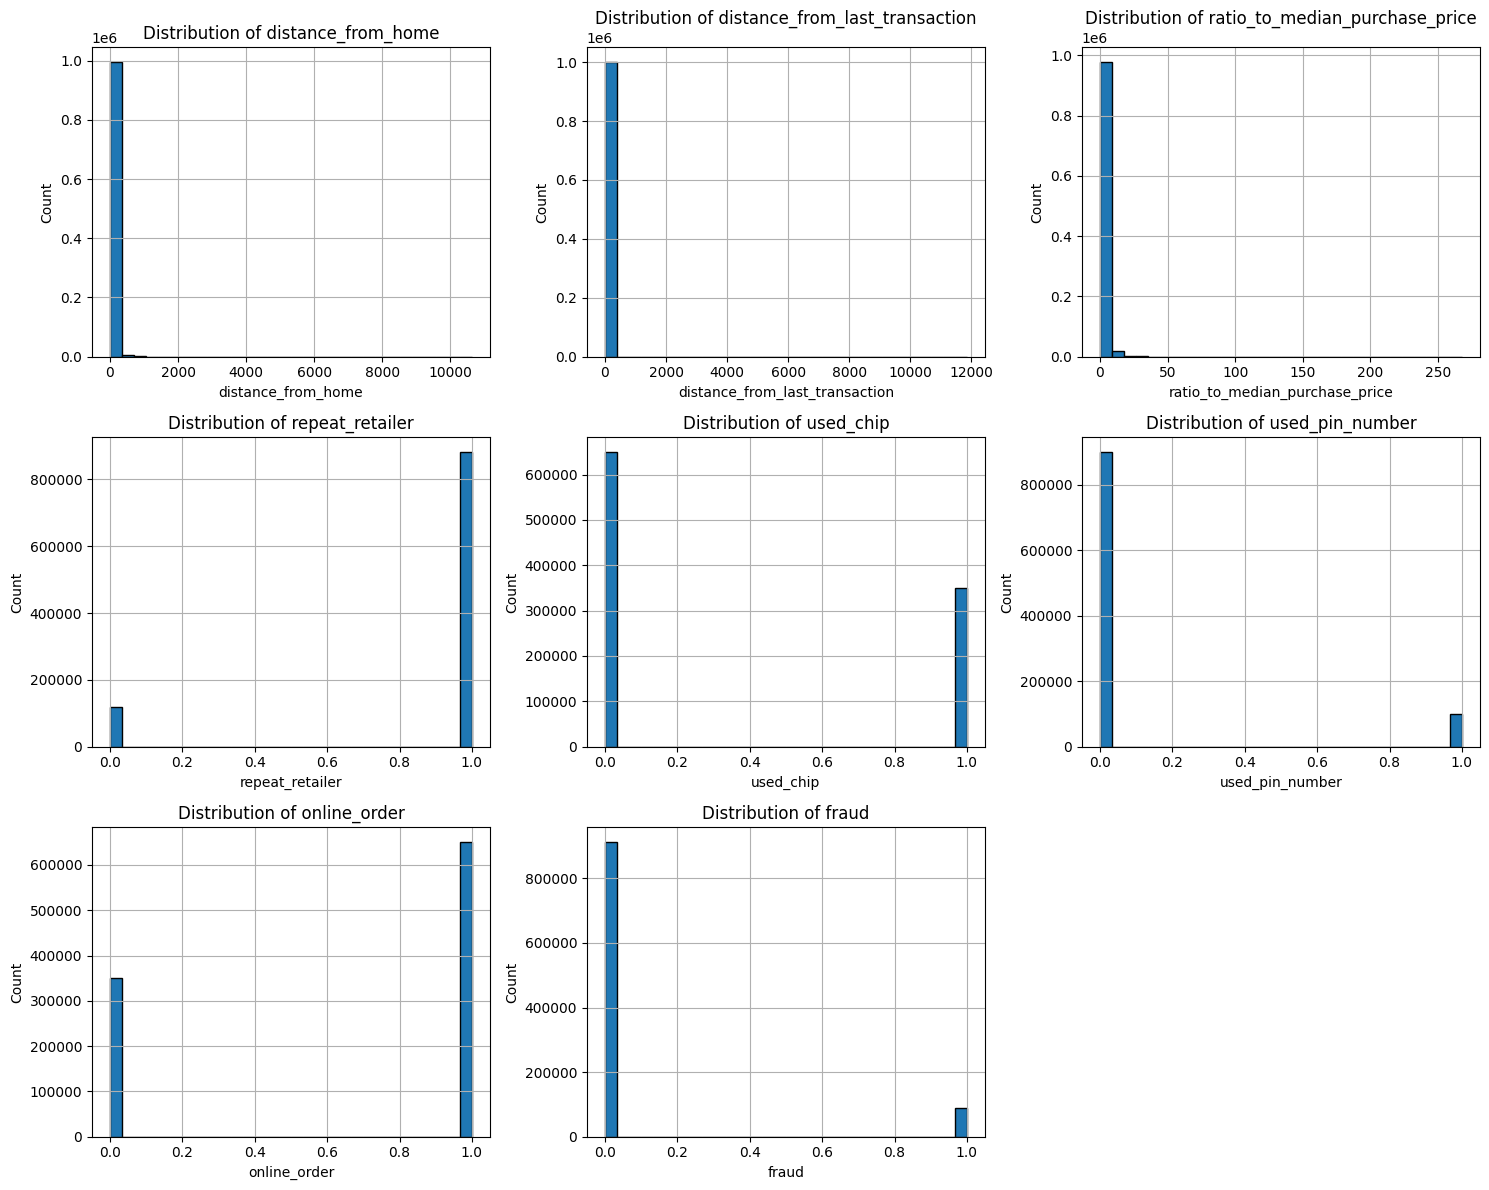

In [11]:
# Erstelle Histogramme für jede numerische Spalte im DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i)  # Automatische Anordnung der Plots
    df[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Correlation Matrix:
                                 distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction            0.000193   
ratio_to_median_purchase_price           -0.001374   
repeat_retailer                           0.143124   
used_chip                                -0.000697   
used_pin_number                          -0.001622   
online_order                             -0.001301   
fraud                                     0.187571   

                                distance_from_last_transaction  \
distance_from_home                                    0.000193   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                        0.001013   
repeat_retailer                                      -0.000928   
used_chip                                             0.002055   
used_pin_number                                      -0.000899   
online_order                  

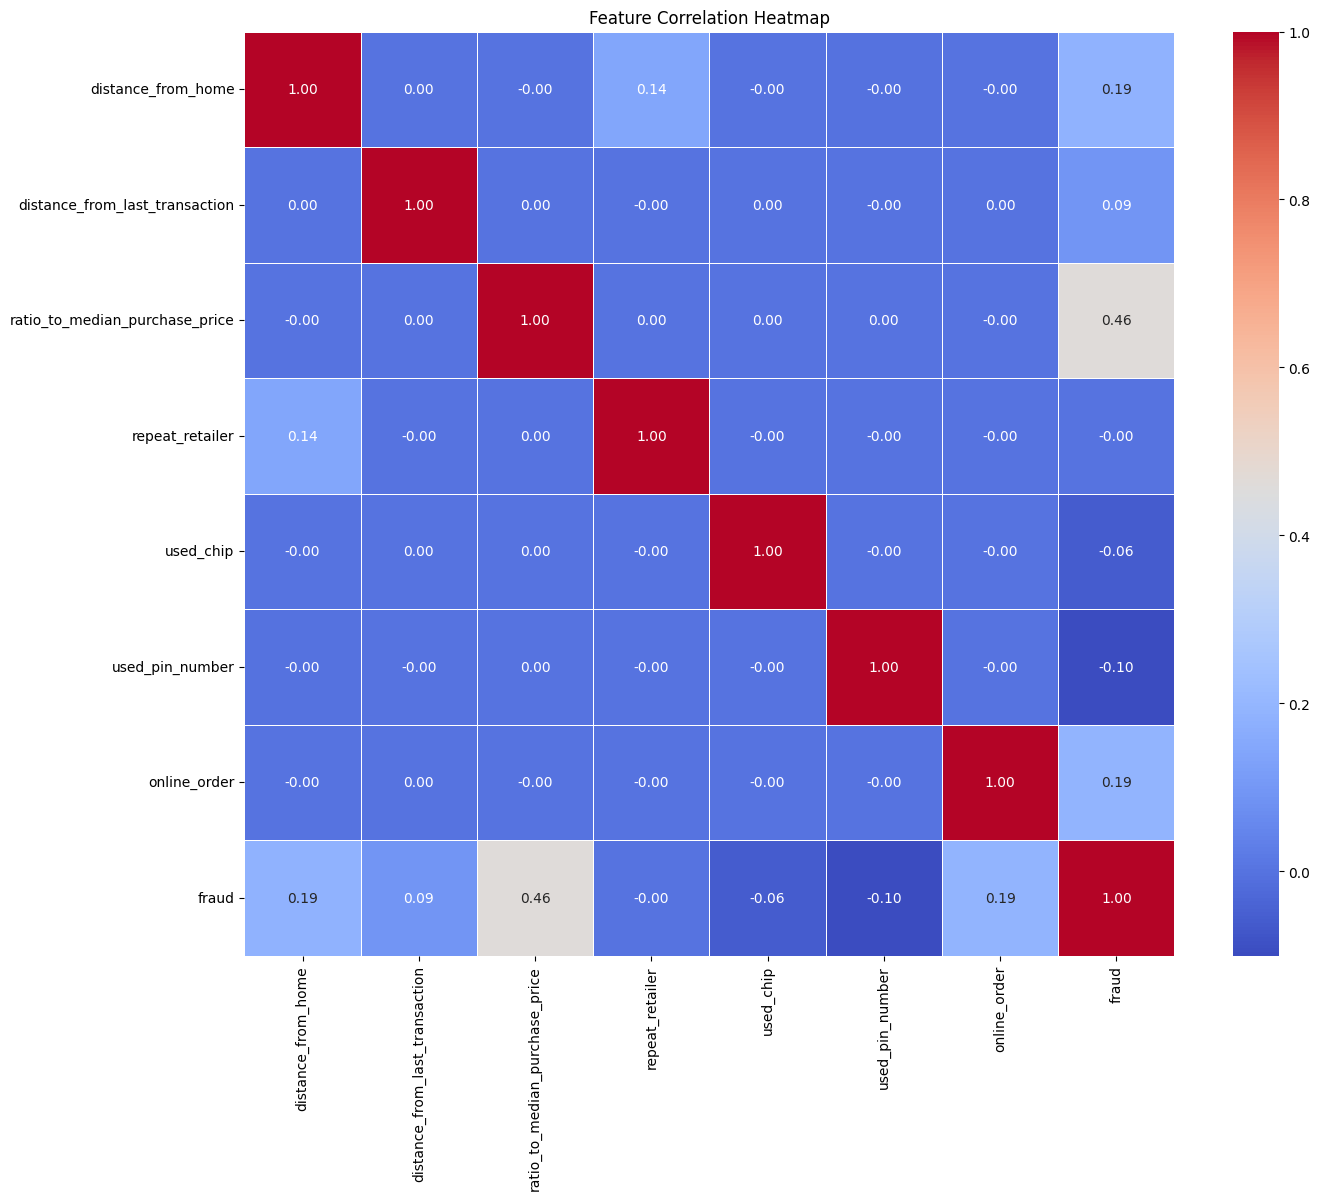

In [12]:
# Berechne die Korrelationsmatrix
correlation_matrix = df.corr()

# Ausgabe der Korrelationsmatrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualisiere die Korrelationsmatrix als Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


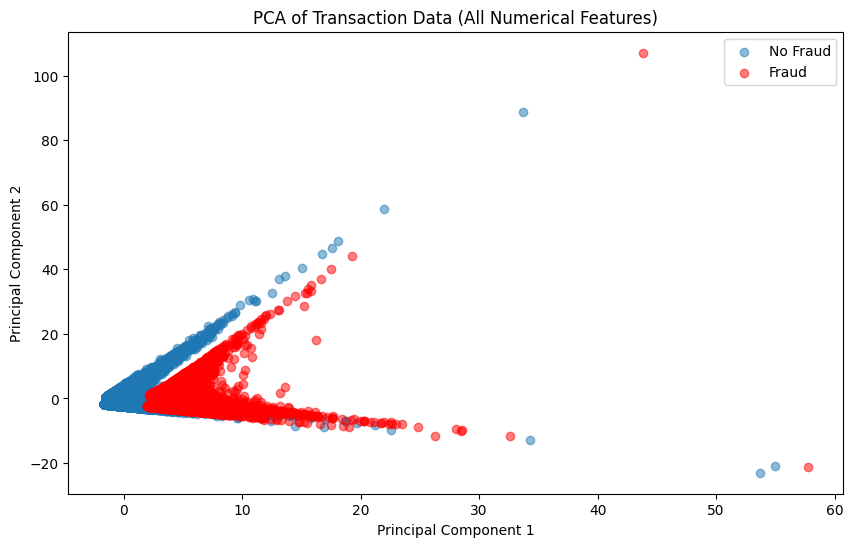

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Wähle alle numerischen Spalten für die PCA
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numerical_features]

# Standardisiere die Daten (wichtig für PCA)
x = StandardScaler().fit_transform(x)

# Führe PCA durch, mit mehr Komponenten, um die Gesamtvarianz besser zu erfassen
pca = PCA(n_components=2)  # Passe n_components ggf. an, um mehr Hauptkomponenten zu betrachten
principal_components = pca.fit_transform(x)

# Speichere die Ergebnisse in einem neuen DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['fraud'] = df['fraud']  # Füge das Ziel-Feature hinzu, um die Betrugsfälle zu markieren

# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['fraud'] == 0]['Principal Component 1'], pca_df[pca_df['fraud'] == 0]['Principal Component 2'], label='No Fraud', alpha=0.5)
plt.scatter(pca_df[pca_df['fraud'] == 1]['Principal Component 1'], pca_df[pca_df['fraud'] == 1]['Principal Component 2'], label='Fraud', alpha=0.5, color='red')
plt.title('PCA of Transaction Data (All Numerical Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



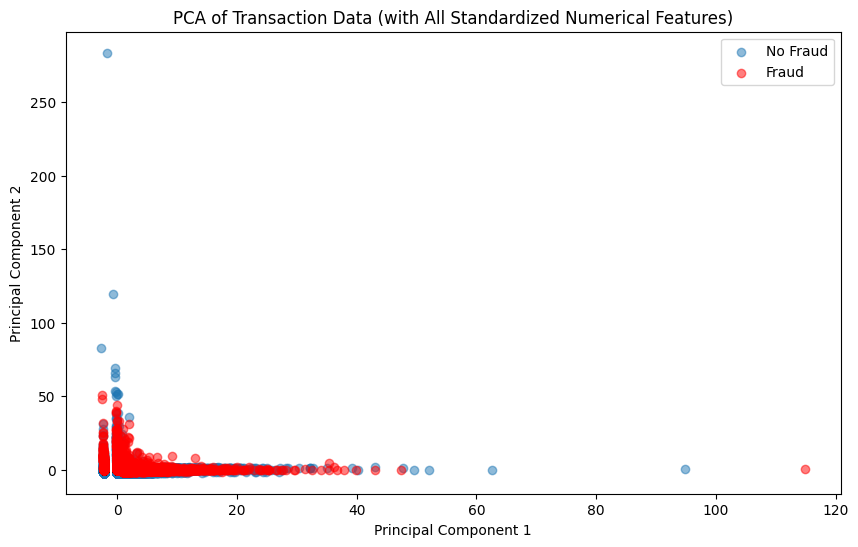

In [14]:
# PCA mit Daten-Skalierung

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Wähle alle numerischen Features (ohne das Ziel-Feature 'fraud')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
features = numerical_features.drop('fraud')  # Entferne das Ziel-Feature 'fraud' für die PCA

# Standardisiere die Daten
x = df[features]
x = StandardScaler().fit_transform(x)

# Führe PCA durch, hier mit 2 Komponenten für die Visualisierung
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Speichere die Ergebnisse in einem neuen DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['fraud'] = df['fraud']  # Füge das Ziel-Feature hinzu, um die Betrugsfälle zu markieren

# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['fraud'] == 0]['Principal Component 1'], pca_df[pca_df['fraud'] == 0]['Principal Component 2'], label='No Fraud', alpha=0.5)
plt.scatter(pca_df[pca_df['fraud'] == 1]['Principal Component 1'], pca_df[pca_df['fraud'] == 1]['Principal Component 2'], label='Fraud', alpha=0.5, color='red')
plt.title('PCA of Transaction Data (with All Standardized Numerical Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



Anzahl der Anomalien: 10000


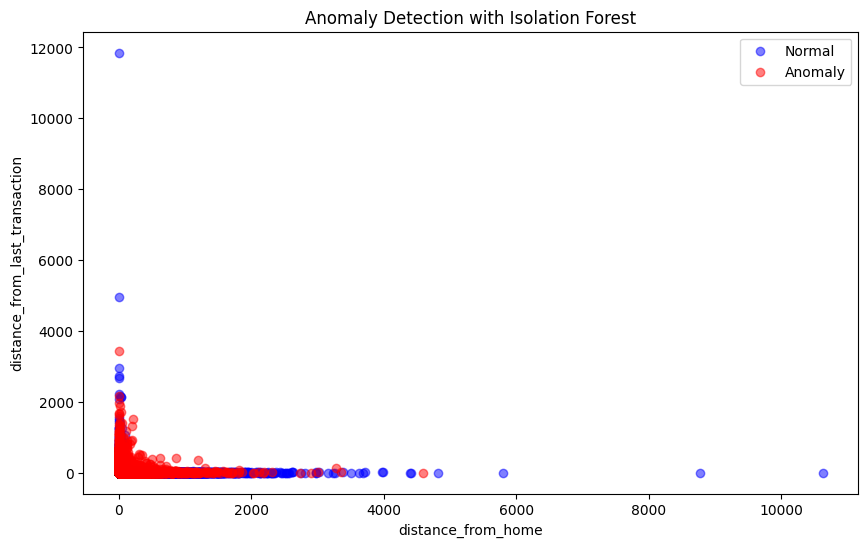

In [15]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Wähle numerische Features für die Anomalieerkennung
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numerical_features]

# Isolation Forest Modell erstellen und anpassen
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% der Daten als Anomalien betrachten
df['anomaly'] = iso_forest.fit_predict(x)

# -1 zeigt Anomalien an, 1 zeigt normale Daten an
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Anzahl der Anomalien ausgeben
print(f"Anzahl der Anomalien: {len(anomalies)}")

# Visualisierung der Anomalien in Bezug auf die ersten beiden Merkmale (für eine einfache Übersicht)
plt.figure(figsize=(10, 6))
plt.scatter(normal[numerical_features[0]], normal[numerical_features[1]], label='Normal', alpha=0.5, c='blue')
plt.scatter(anomalies[numerical_features[0]], anomalies[numerical_features[1]], label='Anomaly', alpha=0.5, c='red')
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.legend()
plt.title('Anomaly Detection with Isolation Forest')
plt.show()


In [16]:
import pandas as pd
import numpy as np


# Liste numerischer Spalten auswählen
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Z-Score Methode
z_score_threshold = 3
z_scores = np.abs((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std())
outliers_z_score = (z_scores > z_score_threshold)

# IQR Methode
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Zähle die Ausreißer pro Spalte für jede Methode
outlier_summary = pd.DataFrame({
    'Z-Score Outliers': outliers_z_score.sum(),
    'IQR Outliers': outliers_iqr.sum()
})

# Ausgabe der Ergebnisse
print("Anzahl der Ausreißer pro Spalte für beide Methoden:")
print(outlier_summary)


Anzahl der Ausreißer pro Spalte für beide Methoden:
                                Z-Score Outliers  IQR Outliers
distance_from_home                         13324        103631
distance_from_last_transaction              7099        124367
ratio_to_median_purchase_price             17061         84386
repeat_retailer                                0        118464
used_chip                                      0             0
used_pin_number                                0        100608
online_order                                   0             0
fraud                                      87403         87403
anomaly                                    10000         10000


# **Unifying & Transformation**

In [17]:
for col_label, col in df.items():
    print(col_label, col, sep='\n', end='\n\n')


distance_from_home
0         57.877857
1         10.829943
2          5.091079
3          2.247564
4         44.190936
            ...    
999995     2.207101
999996    19.872726
999997     2.914857
999998     4.258729
999999    58.108125
Name: distance_from_home, Length: 1000000, dtype: float64

distance_from_last_transaction
0         0.311140
1         0.175592
2         0.805153
3         5.600044
4         0.566486
            ...   
999995    0.112651
999996    2.683904
999997    1.472687
999998    0.242023
999999    0.318110
Name: distance_from_last_transaction, Length: 1000000, dtype: float64

ratio_to_median_purchase_price
0         1.945940
1         1.294219
2         0.427715
3         0.362663
4         2.222767
            ...   
999995    1.626798
999996    2.778303
999997    0.218075
999998    0.475822
999999    0.386920
Name: ratio_to_median_purchase_price, Length: 1000000, dtype: float64

repeat_retailer
0         1.0
1         1.0
2         1.0
3         1.0
4       

## Time Series nicht möglich da keine Zeitspalte vorhanden -> "Für ein Modell zur Betrugserkennung ist eine künstliche Zeitreihe normalerweise nicht optimal, da sie die echten zeitlichen Muster in den Daten nicht widerspiegelt. Eine echte Zeitreihe mit tatsächlichen Transaktionszeiten kann für die Erkennung von Betrug wichtige zeitliche Muster enthalten (z. B. ungewöhnlich häufige Transaktionen innerhalb kurzer Zeit)"

In [18]:
# Grundlegende Transformationen und Vereinheitlichungen

# Konvertierung von Zeitstempeln
# Wenn 'transaction_time' eine Zeitspalte ist

#if 'transaction_time' in df.columns:
   # df['transaction_time'] = pd.to_datetime(df['transaction_time'])
   # df.set_index('transaction_time', inplace=True)

In [25]:
# Verwendung von .itertuples() zur Iteration über Zeilen als benannte Tupel (Beispiel)
# Wir verwenden hier die vorhandenen Spalten 'distance_from_home' und 'distance_from_last_transaction'
# als Beispiel, um eine ähnliche Struktur zu haben wie in dem Dozenten-Notebook.

print("\nIteration mit .itertuples() (Begrenzte Vorschau):")
for row in df[['distance_from_home', 'distance_from_last_transaction']].itertuples():
    print(row)
    if row.Index >= 4:  # Nach 5 Zeilen abbrechen (Index 0 bis 4)
        break



Iteration mit .itertuples() (Begrenzte Vorschau):
Pandas(Index=0, distance_from_home=57.87785658389723, distance_from_last_transaction=0.3111400080477545)
Pandas(Index=1, distance_from_home=10.829942699255543, distance_from_last_transaction=0.1755915022816658)
Pandas(Index=2, distance_from_home=5.091079490616996, distance_from_last_transaction=0.8051525945853258)
Pandas(Index=3, distance_from_home=2.2475643282963613, distance_from_last_transaction=5.60004354707232)
Pandas(Index=4, distance_from_home=44.19093600261837, distance_from_last_transaction=0.5664862680583477)


In [21]:
# Erstellen von Listen aus spezifischen Daten im DataFrame
# Beispiel: Extrahieren der Werte für 'distance_from_home' und 'fraud' in separaten Listen
if 'distance_from_home' in df.columns and 'fraud' in df.columns:
    distance_values = df['distance_from_home'].tolist()
    fraud_labels = df['fraud'].tolist()
    print("\nBeispiel-Distanzwerte:", distance_values[:5])
    print("Beispiel-Betrugsklassifikationen:", fraud_labels[:5])



Beispiel-Distanzwerte: [57.87785658389723, 10.829942699255543, 5.091079490616996, 2.2475643282963613, 44.19093600261837]
Beispiel-Betrugsklassifikationen: [0.0, 0.0, 0.0, 0.0, 0.0]


In [26]:
# Iteration über DataFrame-Spalten und -Zeilen

# Spalten iterieren und ausgeben
print("\nIteration über die Spalten:")
for col_label, col in df.items():
    print(f"Spalte: {col_label}")
    print(f"Daten:\n{col.head()}")
    print('-' * 40)

# Zeilen iterieren und ausgeben (nur die ersten 5 Zeilen zur Übersicht)
print("\nIteration über die ersten 5 Zeilen:")
for row_label, row in df.head(5).iterrows():
    print(f"Zeile: {row_label}")
    print(f"Daten:\n{row}")
    print('-' * 40)


Iteration über die Spalten:
Spalte: distance_from_home
Daten:
0    57.877857
1    10.829943
2     5.091079
3     2.247564
4    44.190936
Name: distance_from_home, dtype: float64
----------------------------------------
Spalte: distance_from_last_transaction
Daten:
0    0.311140
1    0.175592
2    0.805153
3    5.600044
4    0.566486
Name: distance_from_last_transaction, dtype: float64
----------------------------------------
Spalte: ratio_to_median_purchase_price
Daten:
0    1.945940
1    1.294219
2    0.427715
3    0.362663
4    2.222767
Name: ratio_to_median_purchase_price, dtype: float64
----------------------------------------
Spalte: repeat_retailer
Daten:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: repeat_retailer, dtype: float64
----------------------------------------
Spalte: used_chip
Daten:
0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: used_chip, dtype: float64
----------------------------------------
Spalte: used_pin_number
Daten:
0    0.0
1    0.0
2    0.0
3   